In [1]:
import os
import numpy as np
from astropy.io import fits
from tqdm import tqdm
from PIL import Image
import cv2
import pickle
import matplotlib.pyplot as plt
from astropy.visualization import make_lupton_rgb

In [2]:
def cut(img):
    temp = img.reshape(-1)
    for i in range(temp.shape[0]):
        if temp[i] < 0:
            temp[i] = 0
        elif temp[i] > 255:
            temp[i] = 255
    return temp.reshape(3, 256, 256)
def load_img(filename):
    if ".fits" in filename:
        with fits.open(filename) as hdul:
            return hdul[0].data
    elif ".dat" in filename:
        with open(filename, "rb") as f:
            return pickle.load(f)
    else:
        raise TypeError

In [3]:
path = "/data/renhaoye/decals_2022/in_decals/fits/"
stretch = 0.03
Q = 10
fits_dir = os.listdir(path)

/data/renhaoye/decals_2022/in_decals/fits/115.630741_28.982041.fits


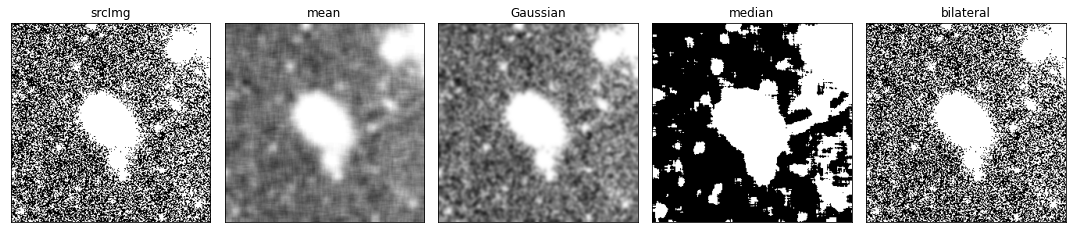

In [5]:
raw = load_img(path + fits_dir[74125])
print(path + fits_dir[74125])
lum = (raw[0] + raw[1] + raw[2]) / 3
img = make_lupton_rgb(lum, lum, lum, stretch=stretch, Q=Q).reshape(-1)
binary_img = cv2.threshold(img, 5, 255,cv2.THRESH_BINARY)[1].reshape(256, 256, 3)
# 均值滤波
img_mean = cv2.blur(binary_img, (11,11))
# 高斯滤波
img_Guassian = cv2.GaussianBlur(binary_img,(11,11),0)
# 中值滤波
img_median = cv2.medianBlur(binary_img, 13)
# 双边滤波
img_bilater = cv2.bilateralFilter(binary_img,11,75,75)
titles = ['srcImg','mean', 'Gaussian', 'median', 'bilateral']
imgs = [binary_img, img_mean, img_Guassian, img_median, img_bilater]
plt.figure(figsize=(15,20))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(imgs[i])
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()

/data/renhaoye/decals_2022/in_decals/fits/213.615492_-0.46886.fits
二值化后三通道是否相同： True


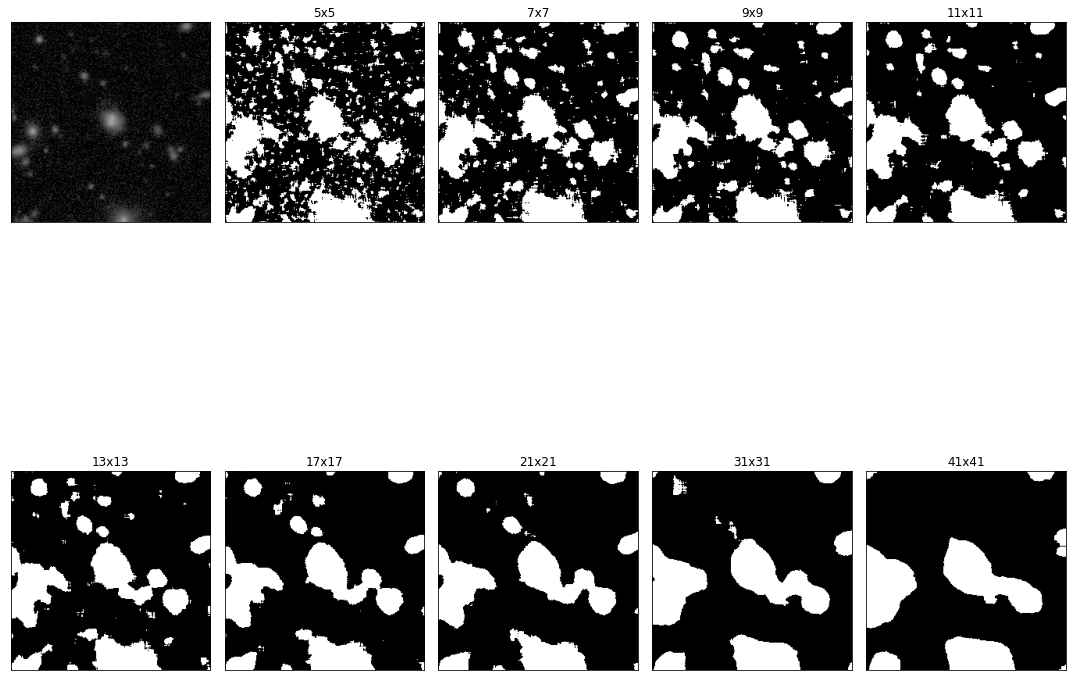

In [6]:
index = 31521
raw = load_img(path + fits_dir[index])
print(path + fits_dir[index])
lum = (raw[0] + raw[1] + raw[2]) / 3
img = make_lupton_rgb(lum, lum, lum, stretch=stretch, Q=Q).reshape(-1)
binary_img = cv2.threshold(img, 10, 255,cv2.THRESH_BINARY)[1].reshape(256, 256, 3)
print("二值化后三通道是否相同：",(binary_img[:,:,0]==binary_img[:,:,1]).all())
# 中值滤波
img_median_5 = cv2.medianBlur(binary_img, 5)
img_median_7 = cv2.medianBlur(binary_img, 7)
img_median_9 = cv2.medianBlur(binary_img, 9)
img_median_11 = cv2.medianBlur(binary_img, 11)
img_median_13 = cv2.medianBlur(binary_img, 13)
img_median_17 = cv2.medianBlur(binary_img, 17)
img_median_21 = cv2.medianBlur(binary_img, 21)
img_median_31 = cv2.medianBlur(binary_img, 31)
img_median_41 = cv2.medianBlur(binary_img, 41)
# 展示不同的图片
titles = ['5x5','7x7', '9x9', '11x11', '13x13', '17x17', '21x21', '31x31', '41x41']
imgs = [img_median_5, img_median_7, img_median_9, img_median_11, img_median_13, img_median_17, img_median_21, img_median_31, img_median_41]
plt.figure(figsize=(15,20))
plt.subplot(3, 5, 1)
plt.imshow(img.reshape(256, 256, 3))
plt.xticks([])
plt.yticks([])
for i in range(len(titles)):
    plt.subplot(3,5,i+2)#注意，这和matlab中类似，没有0，数组下标从1开始
    plt.imshow(imgs[i])
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()

In [7]:
def separate(raw, stretch, Q, kernel_size, threshold):
    lum = (raw[0] + raw[1] + raw[2]) / 3
    img = make_lupton_rgb(lum, lum, lum, stretch=stretch, Q=Q).reshape(-1)
    binary_img = cv2.threshold(img, threshold, 255,cv2.THRESH_BINARY)[1].reshape(256, 256, 3)
    return cv2.medianBlur(binary_img, kernel_size)

/data/renhaoye/decals_2022/in_decals/fits/245.122083_7.349488.fits


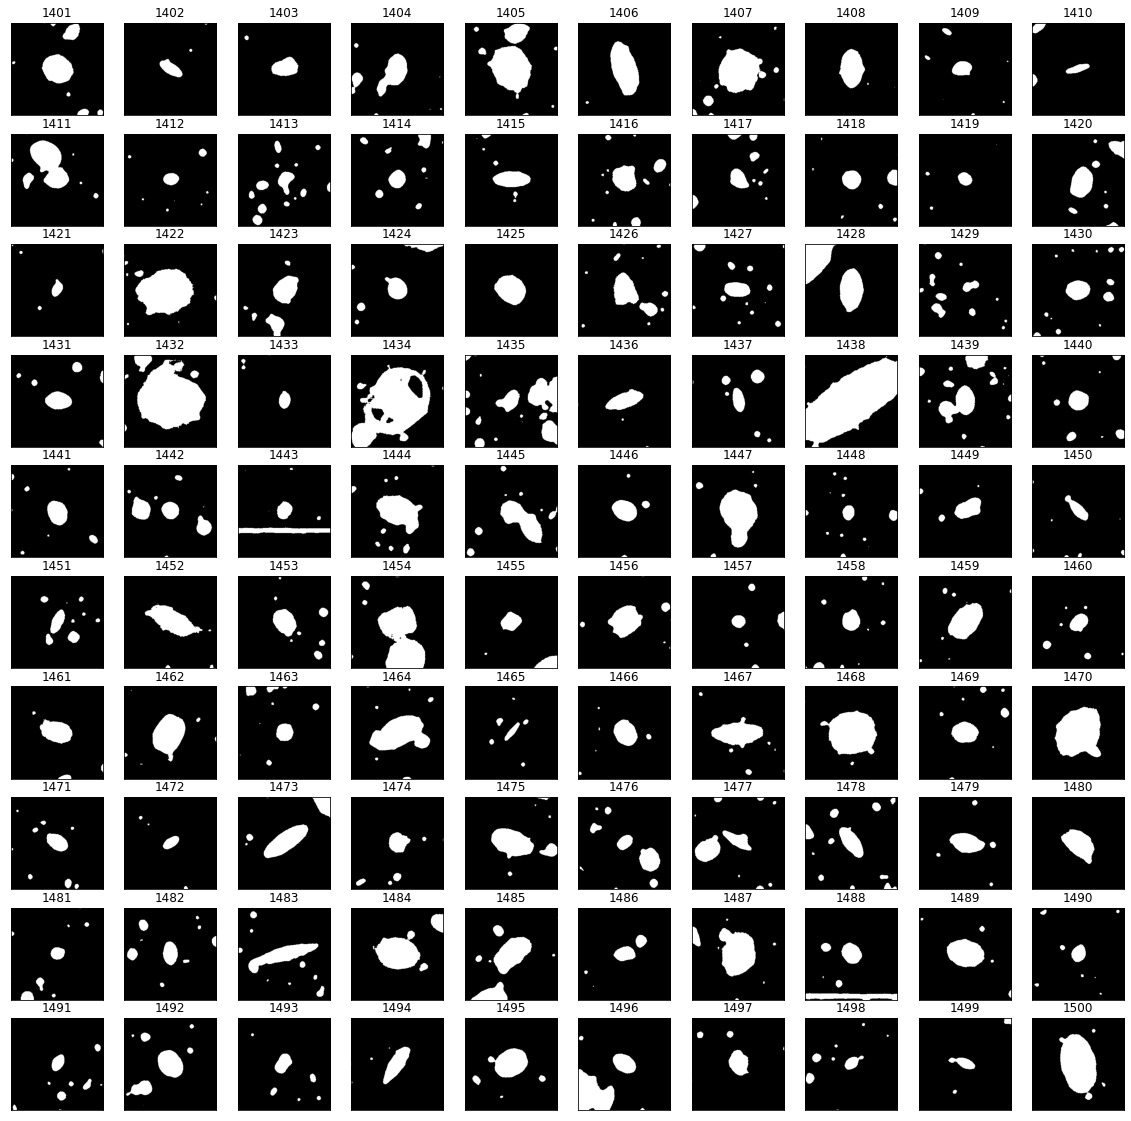

In [8]:
plt.figure(figsize=(20,20))
print(path + fits_dir[1235])
start = 1400
pro = [199,621,739,899,1235]
test = [1434, 1401]
for i in range(start + 1,start + 101):
    plt.subplot(10, 10, i - start)
# # for i in range(len(pro)):
# #     plt.subplot(10, 10, i + 1)
# for i in range(len(test)):
#     plt.subplot(10, 10, i + 1)
    img = load_img(path + fits_dir[i])
    plt.imshow(separate(img, Q=Q, stretch=0.08, kernel_size=13,threshold=20))
    # plt.imsave("/data/renhaoye/decals_2022/%s.jpg" % test[i], arr = separate(path + fits_dir[test[i]], Q=Q, stretch=stretch, kernel_size=13,threshold=20))
    plt.title(i)
    plt.xticks([])
    plt.yticks([])
plt.show()
# for i in tqdm(range(len(pro))):
# os.system("cp %s /data/renhaoye/decals_2022/%s.fits" % (path + fits_dir[1434], 1434))

In [39]:
def mkdir(path):
    if not os.path.isdir(path):
        os.mkdir(path)
def do_separate(input_dir, output_dir):
    mkdir(output_dir)
    files = os.listdir(input_dir)
    for i in tqdm(range(len(files))):
    # for i in tqdm(range(1)):
        img = load_img(input_dir + files[i])
        if img.shape[0] == 3:
            mask = separate(img, Q=Q, stretch=0.08, kernel_size=13,threshold=20)[:,:,0]
            output = np.concatenate((img, mask.reshape(1, 256, 256)), axis=0)
            with open(output_dir + files[i], 'wb') as f:
                pickle.dump(output, f)


def multi_mask(input_dir, output_dir):
    mkdir(output_dir)
    files = os.listdir(input_dir)
    for i in tqdm(range(len(files))):
        # for i in tqdm(range(1)):
        img = load_img(input_dir + files[i])
        if img.shape[0] == 3:
            mask = separate(img, Q=Q, stretch=0.08, kernel_size=13, threshold=20)[:, :, 0]
            mask[mask == 255] = 1
            output = img * mask
            with open(output_dir + files[i], 'wb') as f:
                pickle.dump(output, f)

In [ ]:
t = ["trainingSet", "testSet", "validationSet"]
index = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
for k in range(len(t)):
    for i in range(len(index)):
        do_separate("/data/renhaoye/decals_2022/in_decals/dataset/%s/%d/" % (t[k], index[i]), "/data/renhaoye/decals_2022/in_decals/masked_dataset/%s/%d/" % (t[k], index[i]))
for k in range(len(t)):
    for i in range(len(index)):
        multi_mask("/data/renhaoye/decals_2022/in_decals/dataset/%s/%d/" % (t[k], index[i]), "/data/renhaoye/decals_2022/in_decals/multi_mask_dataset/%s/%d/" % (t[k], index[i]))

 32%|████████████                          | 7314/23136 [17:56<44:07,  5.98it/s]

In [96]:
def scale_img(input_dir, output_dir):
    mkdir(output_dir)
    files = os.listdir(input_dir)
    for i in tqdm(range(len(files))):
    # for i in tqdm(range(1)):
        raw = load_img(input_dir + files[i])
        if img.shape[0] == 3:
            scaled = make_lupton_rgb(raw[0], raw[1], raw[2], stretch=0.08, Q=Q)
            cv2.imwrite(filename=output_dir + files[i].split(".dat")[0] + ".jpg", img=scaled)

In [97]:
t = ["trainingSet", "testSet", "validationSet"]
index = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
for k in range(len(t)):
# for k in range(2,3):
    for i in range(len(index)):
    # for i in range(2,3):
        print("/data/renhaoye/decals_2022/in_decals/dataset/%s/%d/" % (t[k], index[i]), "/data/renhaoye/decals_2022/in_decals/jpg/%s/%d/" % (t[k], index[i]))
        scale_img("/data/renhaoye/decals_2022/in_decals/dataset/%s/%d/" % (t[k], index[i]), "/data/renhaoye/decals_2022/in_decals/jpg/%s/%d/" % (t[k], index[i]))

/data/renhaoye/decals_2022/in_decals/dataset/trainingSet/0/ /data/renhaoye/decals_2022/in_decals/jpg/trainingSet/0/


100%|█████████████████████████████████████| 23136/23136 [49:12<00:00,  7.84it/s]


/data/renhaoye/decals_2022/in_decals/dataset/trainingSet/1/ /data/renhaoye/decals_2022/in_decals/jpg/trainingSet/1/


100%|█████████████████████████████████████| 30435/30435 [36:12<00:00, 14.01it/s]


/data/renhaoye/decals_2022/in_decals/dataset/trainingSet/2/ /data/renhaoye/decals_2022/in_decals/jpg/trainingSet/2/


100%|█████████████████████████████████████| 17196/17196 [22:06<00:00, 12.96it/s]


/data/renhaoye/decals_2022/in_decals/dataset/trainingSet/3/ /data/renhaoye/decals_2022/in_decals/jpg/trainingSet/3/


100%|█████████████████████████████████████| 21237/21237 [29:20<00:00, 12.06it/s]


/data/renhaoye/decals_2022/in_decals/dataset/trainingSet/4/ /data/renhaoye/decals_2022/in_decals/jpg/trainingSet/4/


100%|███████████████████████████████████████| 9444/9444 [11:35<00:00, 13.58it/s]


/data/renhaoye/decals_2022/in_decals/dataset/trainingSet/5/ /data/renhaoye/decals_2022/in_decals/jpg/trainingSet/5/


100%|█████████████████████████████████████| 12655/12655 [16:55<00:00, 12.46it/s]


/data/renhaoye/decals_2022/in_decals/dataset/trainingSet/6/ /data/renhaoye/decals_2022/in_decals/jpg/trainingSet/6/


100%|█████████████████████████████████████| 26732/26732 [35:56<00:00, 12.40it/s]


/data/renhaoye/decals_2022/in_decals/dataset/trainingSet/7/ /data/renhaoye/decals_2022/in_decals/jpg/trainingSet/7/


100%|█████████████████████████████████████| 16512/16512 [48:53<00:00,  5.63it/s]


/data/renhaoye/decals_2022/in_decals/dataset/trainingSet/8/ /data/renhaoye/decals_2022/in_decals/jpg/trainingSet/8/


100%|█████████████████████████████████████| 11284/11284 [14:22<00:00, 13.08it/s]


/data/renhaoye/decals_2022/in_decals/dataset/trainingSet/9/ /data/renhaoye/decals_2022/in_decals/jpg/trainingSet/9/


100%|█████████████████████████████████████| 12928/12928 [16:04<00:00, 13.40it/s]


/data/renhaoye/decals_2022/in_decals/dataset/testSet/0/ /data/renhaoye/decals_2022/in_decals/jpg/testSet/0/


100%|█████████████████████████████████████████| 722/722 [00:10<00:00, 69.63it/s]


/data/renhaoye/decals_2022/in_decals/dataset/testSet/1/ /data/renhaoye/decals_2022/in_decals/jpg/testSet/1/


100%|███████████████████████████████████████| 3803/3803 [04:01<00:00, 15.76it/s]


/data/renhaoye/decals_2022/in_decals/dataset/testSet/2/ /data/renhaoye/decals_2022/in_decals/jpg/testSet/2/


100%|███████████████████████████████████████| 2148/2148 [01:51<00:00, 19.28it/s]


/data/renhaoye/decals_2022/in_decals/dataset/testSet/3/ /data/renhaoye/decals_2022/in_decals/jpg/testSet/3/


100%|███████████████████████████████████████| 2654/2654 [02:50<00:00, 15.54it/s]


/data/renhaoye/decals_2022/in_decals/dataset/testSet/4/ /data/renhaoye/decals_2022/in_decals/jpg/testSet/4/


100%|█████████████████████████████████████████| 294/294 [00:04<00:00, 70.95it/s]


/data/renhaoye/decals_2022/in_decals/dataset/testSet/5/ /data/renhaoye/decals_2022/in_decals/jpg/testSet/5/


100%|███████████████████████████████████████| 1581/1581 [01:12<00:00, 21.94it/s]


/data/renhaoye/decals_2022/in_decals/dataset/testSet/6/ /data/renhaoye/decals_2022/in_decals/jpg/testSet/6/


100%|███████████████████████████████████████| 3340/3340 [03:30<00:00, 15.85it/s]


/data/renhaoye/decals_2022/in_decals/dataset/testSet/7/ /data/renhaoye/decals_2022/in_decals/jpg/testSet/7/


100%|█████████████████████████████████████████| 515/515 [00:07<00:00, 68.19it/s]


/data/renhaoye/decals_2022/in_decals/dataset/testSet/8/ /data/renhaoye/decals_2022/in_decals/jpg/testSet/8/


100%|█████████████████████████████████████████| 352/352 [00:04<00:00, 73.57it/s]


/data/renhaoye/decals_2022/in_decals/dataset/testSet/9/ /data/renhaoye/decals_2022/in_decals/jpg/testSet/9/


100%|█████████████████████████████████████████| 403/403 [00:05<00:00, 72.93it/s]


/data/renhaoye/decals_2022/in_decals/dataset/validationSet/0/ /data/renhaoye/decals_2022/in_decals/jpg/validationSet/0/


100%|█████████████████████████████████████████| 723/723 [00:10<00:00, 67.78it/s]


/data/renhaoye/decals_2022/in_decals/dataset/validationSet/1/ /data/renhaoye/decals_2022/in_decals/jpg/validationSet/1/


100%|███████████████████████████████████████| 3804/3804 [03:55<00:00, 16.15it/s]


/data/renhaoye/decals_2022/in_decals/dataset/validationSet/2/ /data/renhaoye/decals_2022/in_decals/jpg/validationSet/2/


100%|███████████████████████████████████████| 2149/2149 [01:57<00:00, 18.22it/s]


/data/renhaoye/decals_2022/in_decals/dataset/validationSet/3/ /data/renhaoye/decals_2022/in_decals/jpg/validationSet/3/


100%|███████████████████████████████████████| 2654/2654 [02:46<00:00, 15.94it/s]


/data/renhaoye/decals_2022/in_decals/dataset/validationSet/4/ /data/renhaoye/decals_2022/in_decals/jpg/validationSet/4/


100%|█████████████████████████████████████████| 295/295 [00:04<00:00, 63.33it/s]


/data/renhaoye/decals_2022/in_decals/dataset/validationSet/5/ /data/renhaoye/decals_2022/in_decals/jpg/validationSet/5/


100%|███████████████████████████████████████| 1581/1581 [01:09<00:00, 22.77it/s]


/data/renhaoye/decals_2022/in_decals/dataset/validationSet/6/ /data/renhaoye/decals_2022/in_decals/jpg/validationSet/6/


100%|███████████████████████████████████████| 3341/3341 [03:48<00:00, 14.63it/s]


/data/renhaoye/decals_2022/in_decals/dataset/validationSet/7/ /data/renhaoye/decals_2022/in_decals/jpg/validationSet/7/


100%|█████████████████████████████████████████| 515/515 [00:08<00:00, 60.94it/s]


/data/renhaoye/decals_2022/in_decals/dataset/validationSet/8/ /data/renhaoye/decals_2022/in_decals/jpg/validationSet/8/


100%|█████████████████████████████████████████| 352/352 [00:04<00:00, 78.77it/s]


/data/renhaoye/decals_2022/in_decals/dataset/validationSet/9/ /data/renhaoye/decals_2022/in_decals/jpg/validationSet/9/


100%|█████████████████████████████████████████| 404/404 [00:05<00:00, 73.63it/s]


In [99]:
img = load_img("/data/renhaoye/217.880573_4.852192_raw.dat")
hdu = fits.PrimaryHDU(img)
hdulist = fits.HDUList([hdu])
hdulist.writeto("/data/renhaoye/217.880573_4.852192_raw.fits")
hdulist.close()